
##### Input Data #####


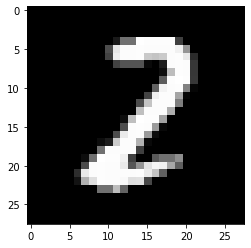


##### 예측 및 분류 결과 #####
---------- 예측 숫자 : 2


In [12]:
import requests
import os
import json
import base64
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
"""
Image Classification Tutorial : MNIST 손글씨
출처 : TorchServe Github : https://github.com/pytorch/serve/tree/master/examples/image_classifier/mnist
Pytorch 기반의 TorchServe는 하나의 내부 IP Address에 Endpoint가 모델 단위로 분류됩니다.
모델의 목록을 조회하고 싶다면, [GET] http://${IP_ADDRESS}:80/v1/models 를 통해 확인할 수 있습니다.
"""
# 모델 서버 예측 REST API
# Model Name : mnist
# URL = {REST_API_URL}
URL = "http://mnist-model-server.demo.svc.cluster.local/v1/models/mnist-model-server:predict"


# 테스트 이미지 경로
image_path = os.getcwd() + "/test_data/2.png"

img = Image.open(image_path).convert("L")
img = np.array(img)
img = img.reshape([-1, 784])

# KServe Input 포맷에 맞추는 작업
input_data = {"instances" :img.tolist()}
print("\n##### Input Data #####")
visual_img = Image.open(image_path).convert("RGB")
plt.imshow(visual_img)
plt.show()


# JSON으로 Input 포맷 변환
data = json.dumps(input_data)

# 모델 예측 API 호출 및 응답 저장
prediction = requests.post(URL, data)
result_list = str(prediction.json()["predictions"][0])[1:-1].split(',')

# 에측 및 분류 결과 출력
print("\n##### 예측 및 분류 결과 #####")
print(f"---------- 예측 숫자 : {result_list.index(' 1.0')}")